# Problem 432 : Sum of Sum of Divisors

In [113]:
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import timedelta

In [114]:
def timecost(f,n):
    start = timer()
    f(n)
    end = timer()
    return timedelta(seconds=end-start).total_seconds()

In [115]:
def isprime (n):
    if n % 2 == 0: return False
    
    nsqrt = int(math.sqrt(n))

    i=3
    while i <= nsqrt :
        remainder = n % i
        if remainder == 0 : 
            return False
        else: 
            i = i + 2
    return True
            

In [116]:
def nextprime (n):
    if n % 2 == 0:
        i = n + 1
    else:
        i = n + 2
        
    while not isprime(i):
        i = i  + 2
    return i
    

In [186]:
def divisors(n):
    divs = []
    nsqrt = int(math.sqrt(n))
    i = 1
    while i <= nsqrt :
        quotient = n/i
        remainder = n % i
        if remainder == 0 : 
            divs.extend([i,quotient])
        i = i + 1
    
    divs = list(set(divs))
    divs.sort()
    return divs

In [203]:
# Naive Sum of Sum of Divisors
def naive_ssofdivisors(n):
    S = 0
    for i in range(1, n+1):
        S = S + sum(divisors(i))
    return S

In [204]:
# Fast Sum of Sum of Divisors
def fast_ssofdivisors(n):
    S = 0
    for i in range(1, n+1):
        S = S + i * (n / i)
    return S

In [202]:
timecost(fast_sumofdivisors,10**7)

0.860565

In [201]:
timecost(naive_sumofdivisors,10**5)

2.618114

In [206]:
def naive_solution(n):
    S = 0
    for i in range(1,n+1):
        for j in range(1,n+1):
            S = S + sum(divisors(i*j))
    return S

In [210]:
timecost(naive_solution,1000)

57.426445

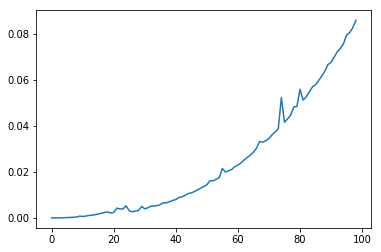

In [211]:
tcost = [timecost(naive_solution,i) for i in range(1,100)]
plt.plot(tcost)